In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(14, 6))

In [3]:
df = pd.read_csv("./aluguel.csv", sep=";")

In [4]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [5]:
s_group = df.groupby(["Tipo"])["Valor"]

In [6]:
q_1 = s_group.quantile(.25)
q_3 = s_group.quantile(.75)
iiq = q_3 - q_1
limit_lower = q_1 - 1.5 * iiq
limit_biggest = q_3 + 1.5 * iiq

In [7]:
new_df = pd.concat([
    df.query(
        "Tipo == @tipo"
        " & @limit_lower[@tipo] <= Valor <= @limit_biggest[@tipo]"
    ) for tipo in s_group.groups
])

In [8]:
area = plt.figure()

<Figure size 1400x600 with 0 Axes>

In [9]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [10]:
g1.scatter(new_df.Valor, new_df.Area)
g1.set_title("Valor X Área")

Text(0.5, 1.0, 'Valor X Área')

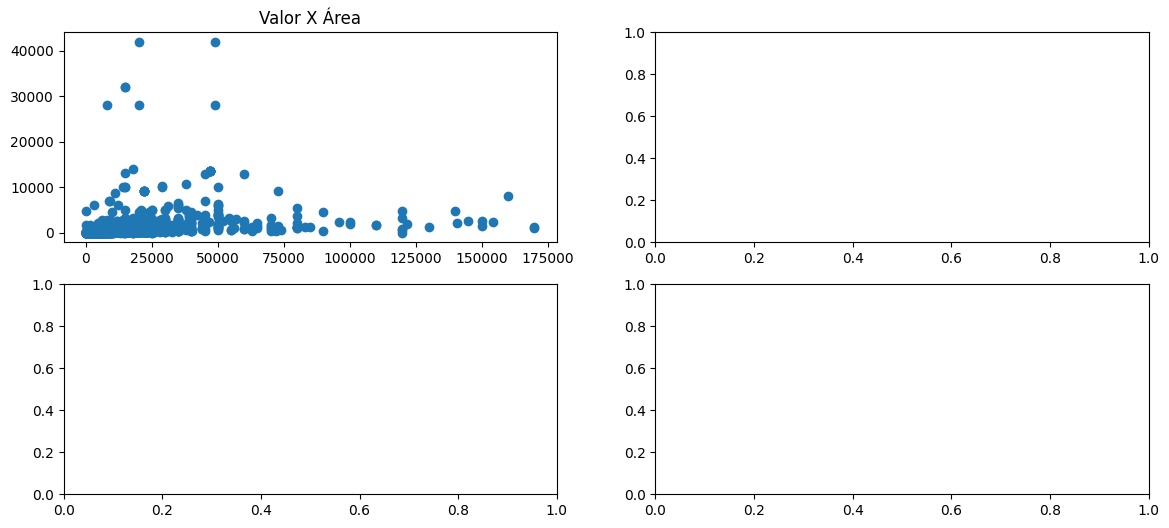

In [11]:
area

In [12]:
g2.hist(new_df.Valor)
g2.set_title("Histograma")

Text(0.5, 1.0, 'Histograma')

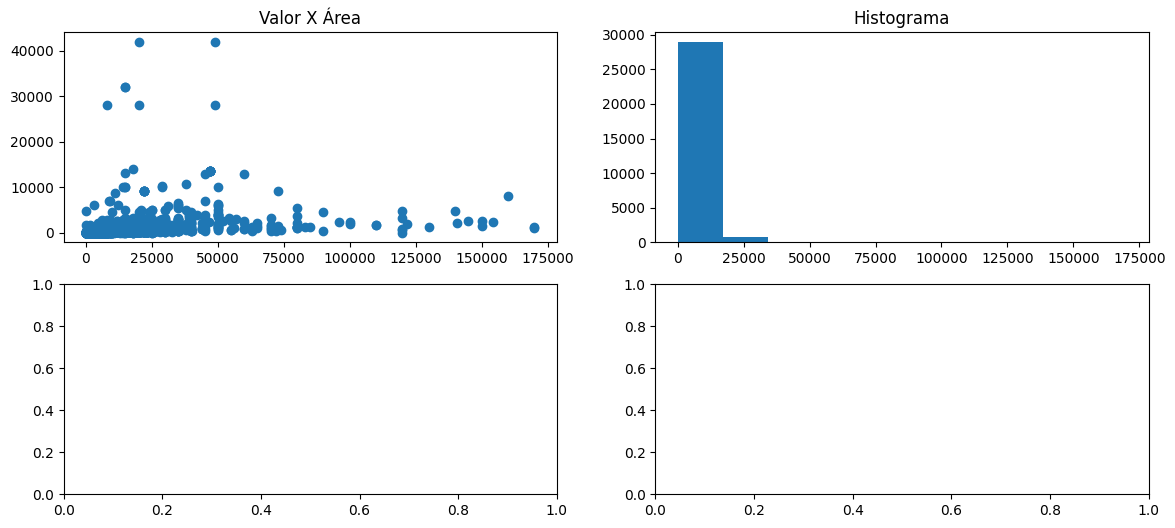

In [13]:
area

In [14]:
sample_value_g3 = new_df.Valor.sample(100).reset_index(drop=True)

In [15]:
g3.plot(sample_value_g3)
g3.set_title("Amostra (Valor)")

Text(0.5, 1.0, 'Amostra (Valor)')

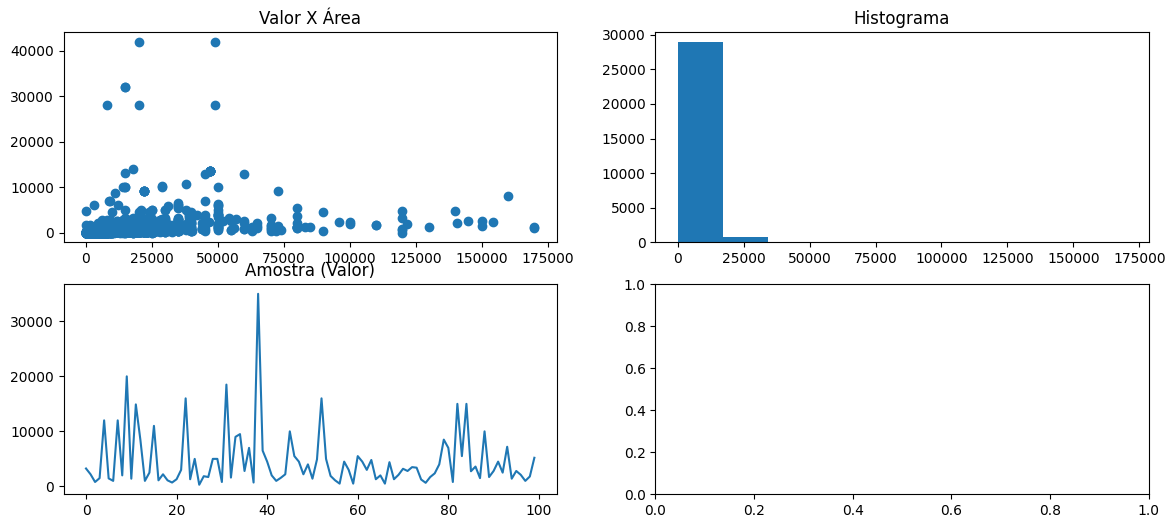

In [16]:
area

In [17]:
group = new_df.groupby("Tipo").Valor
group_mean = group.mean()

In [18]:
g4.bar(group_mean.index, group_mean.values)
g4.set_title("Valor Médio por Tipo")

Text(0.5, 1.0, 'Valor Médio por Tipo')

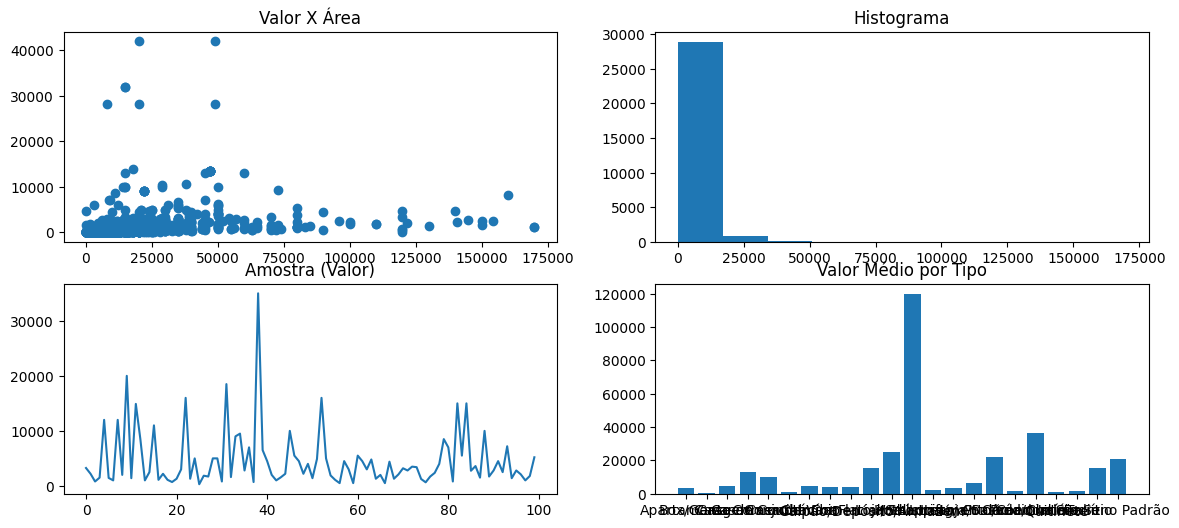

In [19]:
area

In [20]:
area.savefig("./chart_values.png", dpi=300, bbox_inches="tight")